In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
dataAsıl=pd.read_csv("netflix_titles.csv")
dataAsıl.shape

(7787, 12)

In [43]:
dataAsıl.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [47]:
## LabelEncoder kategoric veriyi sayısala dönüştürüyoruz
from sklearn import preprocessing
data=pd.read_csv("netflix_titles.csv")
lb=preprocessing.LabelEncoder()

yedekKolon1=lb.fit_transform(data[["show_id"]])
data["show_id"]=yedekKolon1

##datayı yedekliyoruz id ler ve gerçek bilgileri saklamak için
yedekData=data

yedekKolon2=lb.fit_transform(data[["type"]])
data["type"]=yedekKolon2

##LabelEncoder ile fit edileceği için hata vermemesi için null değer bulunna kolonlardaki null değerleri siliyoruz
data.dropna(subset=["country","director","rating","release_year"],inplace=True)

yedekKolon3=lb.fit_transform(data[["country"]])
data["country"]=yedekKolon3

yedekKolon4=lb.fit_transform(data[["director"]])
data["director"]=yedekKolon4

yedekKolon5=lb.fit_transform(data[["rating"]])
data["rating"]=yedekKolon5

##her hangi bir şekilde sayısal değere otomatik olarak dönüştürülmesi sonucunda çok uzun ve karmaşık string ifadeler
##bulunduğundan bir işe yaramayacak olan kolonları çıkarıyoruz
data.drop(columns=["title","cast","date_added","duration","listed_in","description"],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [45]:
##OneHotEncoder
data=pd.read_csv("netflix_titles.csv")
yedek=data.iloc[:,1:2].values##1:2 -> yani type kolonu
lb=preprocessing.LabelEncoder()
yedek[:,0]=lb.fit_transform(data.iloc[:,1]) ##data.iloc[:,1] -> type kolonu 

ohe=preprocessing.OneHotEncoder()
yedek=ohe.fit_transform(yedek).toarray()
print(yedek)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [52]:
##data=pd.read_csv("netflix_titles.csv")
yedek=data.iloc[:,5:6].values##1:2 -> yani type kolonu
lb=preprocessing.LabelEncoder()
yedek[:,0]=lb.fit_transform(data.iloc[:,5]) ##data.iloc[:,1] -> type kolonu 

ohe=preprocessing.OneHotEncoder()
yedek=ohe.fit_transform(yedek).toarray()
print(yedek)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [59]:
yedek=pd.DataFrame(yedek)
yedek.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
data.head(3) ## 1->tvShow   0->movie

,show_id,type,director,country,release_year,rating
1,1111,0,1788,264,2016,8
2,2222,0,1248,325,2011,5
3,3333,0,3344,478,2009,4


In [17]:
## tüm type değerlerinin ya 0 yada 1 olduğunu gösteriyor
data[data["type"]==2].shape[0]

0

In [18]:
from sklearn.preprocessing import StandardScaler

In [13]:
##Linear-MultiLinear(more column than one) Predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,0:5] , data["rating"] , test_size=0.33,random_state=0)

LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

y_pred.shape

(1713,)

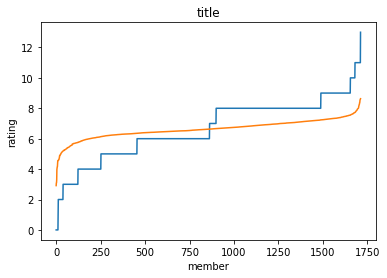

In [12]:
## sort and plot 
y_test=y_test.sort_values()

y_pred=pd.DataFrame(y_pred)
y_pred=y_pred.sort_values(by=0)

fig, ax = plt.subplots()
ax.plot(range(0,1713,1), y_test)
ax.plot(range(0,1713,1), y_pred)

ax.set(xlabel='member', ylabel='rating',
       title='title')
##ax.grid()

plt.show()

In [23]:
##Backward Elimination
import statsmodels.api as sm

data["ekKolon B0 için"]=np.ones(5189)

data_BW=data.iloc[:,[0,1,2,3,4,6]].values
data_BW=np.array(data_BW,dtype=float)
model=sm.OLS(data.iloc[:,5],data_BW).fit()
print(model.summary())
## 0.05(hata payı P>|t|) den büyük olan kolonları çıkarıp tekrar kontrol ediyoruz.